In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import librosa
import librosa.display
from IPython.display import Audio
import soundfile as sf
import opendatasets as od

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio")

100%|██████████| 429M/429M [00:03<00:00, 146MB/s]


In [ ]:
def preprocessing(file):
    X,sample_rate = librosa.load(file)
    # zero crossing
    #silence_removed=zero_crossing(X)
    # Pre emphasis
    y_filt = librosa.effects.preemphasis(X)
    # normalization
    #x_norm=y_filt/max(y_filt)
    return y_filt,sample_rate

In [ ]:
# All the types of emotions that are present
emotions_all={
    '01' : 'neutral', 
    '02' : 'calm' ,
    '03' : 'happy' ,
    '04' : 'sad' ,
    '05' : 'angry', 
    '06' : 'fearful' ,
    '07' : 'disgust', 
    '08' : 'surprised'
}

In [ ]:
emotions=['happy','sad','angry','fearful','disgust']

In [ ]:
sdir="/content/ravdess-emotional-speech-audio/audio_speech_actors_01-24"
classlist=os.listdir(sdir)

In [ ]:
filepaths=[]
labels=[]
for kclass in classlist:
    classpath=os.path.join(sdir,kclass)
    #filepaths.append(classpath)
    classlist1=os.listdir(classpath)
    for f in classlist1:
      filesource=os.path.join(classpath,f)
      file_name = f.split('/')[-1]
      emotion=emotions_all[file_name.split("-")[2]]
      if emotion not in emotions:
            continue
      labels.append(emotion)
      filepaths.append(filesource)
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='number')
df1=pd.concat([Fseries, Lseries], axis=1) 
df1

,filepaths,number
0,/content/ravdess-emotional-speech-audio/audio_...,disgust
1,/content/ravdess-emotional-speech-audio/audio_...,disgust
2,/content/ravdess-emotional-speech-audio/audio_...,fearful
3,/content/ravdess-emotional-speech-audio/audio_...,happy
4,/content/ravdess-emotional-speech-audio/audio_...,angry
...,...,...
955,/content/ravdess-emotional-speech-audio/audio_...,disgust
956,/content/ravdess-emotional-speech-audio/audio_...,fearful
957,/content/ravdess-emotional-speech-audio/audio_...,happy
958,/content/ravdess-emotional-speech-audio/audio_...,happy


In [ ]:
df1['number'].value_counts()

disgust    192
fearful    192
happy      192
angry      192
sad        192
Name: number, dtype: int64

In [ ]:
image_path="/content/image_mfcc/"
os.mkdir(image_path)

In [ ]:
def extract_mfcc(f):
    
    data, sr = librosa.load(f)
    #data = librosa.effects.preemphasis(X)
    fig = plt.figure(figsize=[1,1])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    S = librosa.feature.mfcc(y=data, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmin=50, fmax=280)
    file  = image_path + str(f.split("/")[-1][:-4]) + '.jpg'
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    plt.close()

In [ ]:
for i in df1["filepaths"]:
    extract_mfcc(i)

In [ ]:
from PIL import Image

#read the image
im = Image.open("/content/image_mfcc/03-01-03-01-01-01-01.jpg")
print(im.size)

(387, 385)


In [ ]:
ddir1="/content/image_mfcc"
classlist1=os.listdir(ddir1)

In [ ]:
filepaths1=[]
labels1=[]
for kclass in classlist1:
    if kclass=='.ipynb_checkpoints':
      continue
    classpath1=os.path.join(ddir1,kclass)
    #print(classpath1)
    file_name = classpath1.split('/')[-1]
    #print(file_name)
    emotion=emotions_all[file_name.split("-")[2]]
    #print(emotion)
    if emotion not in emotions:
      continue
    filepaths1.append(classpath1)
    labels1.append(emotion)
Fseries1=pd.Series(filepaths1, name='filepaths')
Lseries1=pd.Series(labels1, name='number')
mel_path=pd.concat([Fseries1, Lseries1], axis=1) 
mel_path

,filepaths,number
0,/content/image_mfcc/03-01-05-01-02-01-04.jpg,angry
1,/content/image_mfcc/03-01-04-01-01-01-18.jpg,sad
2,/content/image_mfcc/03-01-03-02-01-02-07.jpg,happy
3,/content/image_mfcc/03-01-03-02-02-01-18.jpg,happy
4,/content/image_mfcc/03-01-06-01-01-01-06.jpg,fearful
...,...,...
955,/content/image_mfcc/03-01-06-02-02-02-14.jpg,fearful
956,/content/image_mfcc/03-01-04-01-02-01-06.jpg,sad
957,/content/image_mfcc/03-01-04-01-02-02-02.jpg,sad
958,/content/image_mfcc/03-01-07-02-01-01-13.jpg,disgust


In [ ]:
image_path1="/content/aug_image/"
os.mkdir(image_path1)

In [ ]:
def extract_mfcc_aug_shift(f):
    data, sr = librosa.load(f)
    #data = librosa.effects.preemphasis(X)
    #noise = np.random.randn(len(data))
    #augmented_data = data + 0.005 * noise
    #data = augmented_data.astype(type(data[0]))
    s_range = int(np.random.uniform(low=-5,high=5)*1000)
    data = np.roll(data,s_range)
    fig = plt.figure(figsize=[1,1])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    S = librosa.feature.mfcc(y=data, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmin=50, fmax=280)
    file  = image_path1 + str(f.split("/")[-1][:-4]) +'-shift'+ '.jpg'
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    plt.close()

In [ ]:
for i in df1["filepaths"]:
    extract_mfcc_aug_shift(i)

In [ ]:
ddir2="/content/aug_image"
classlist2=os.listdir(ddir2)

In [ ]:
filepaths2=[]
labels2=[]
for kclass in classlist2:
    if kclass=='.ipynb_checkpoints':
      continue
    classpath1=os.path.join(ddir2,kclass)
    #print(classpath1)
    file_name = classpath1.split('/')[-1]
    #print(file_name)
    emotion=emotions_all[file_name.split("-")[2]]
    #print(emotion)
    if emotion not in emotions:
      continue
    filepaths2.append(classpath1)
    labels2.append(emotion)
Fseries2=pd.Series(filepaths2, name='filepaths')
Lseries2=pd.Series(labels2, name='number')
mel_path_aug=pd.concat([Fseries2, Lseries2], axis=1) 
mel_path_aug

,filepaths,number
0,/content/aug_image/03-01-06-02-01-01-04-shift.jpg,fearful
1,/content/aug_image/03-01-06-02-02-02-20-shift.jpg,fearful
2,/content/aug_image/03-01-03-02-01-02-14-shift.jpg,happy
3,/content/aug_image/03-01-05-01-02-02-03-shift.jpg,angry
4,/content/aug_image/03-01-04-01-01-02-02-shift.jpg,sad
...,...,...
955,/content/aug_image/03-01-07-02-01-01-19-shift.jpg,disgust
956,/content/aug_image/03-01-03-02-02-01-24-shift.jpg,happy
957,/content/aug_image/03-01-07-01-02-02-03-shift.jpg,disgust
958,/content/aug_image/03-01-04-02-02-02-04-shift.jpg,sad


In [ ]:
combied_data = pd.concat([mel_path,mel_path_aug], ignore_index=True)

In [ ]:
combied_data.shape

(1920, 2)

In [ ]:
from matplotlib import gridspec

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.applications import ResNet50

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from tqdm.notebook import tqdm
tqdm.pandas()
import cv2, warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Add, Dropout, LSTM, TimeDistributed, Embedding, RepeatVector, Concatenate, Bidirectional, Convolution2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
ResNet50_model = ResNet50(include_top=True)

In [ ]:
last = ResNet50_model.layers[-2].output # Output of the penultimate layer of ResNet model 
model = Model(inputs=ResNet50_model.input,outputs=last)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
k= combied_data['filepaths']

In [ ]:
y= combied_data['number']

In [ ]:
y.shape

(1920,)

In [ ]:
img_features = {}
count = 0
train_Y=[]
train_X=[]
for count, img_path in enumerate(k):
    img = cv2.imread(img_path)
    #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(224,224)) # ResNet model requires images of dimensions (224,224,3)
    img = img.reshape(1,224,224,3) # Reshaping image to the dimensions of a single image
    features = model.predict(img).reshape(2048,) # Feature extraction from images
    #img_name = img_path.split('/')[-1] # Extracting image name
    train_X.append(features)
    #img_features[img_name] = features
    train_Y.append(y[count])

1/1 [==============================] - 0s 21ms/step


In [ ]:
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
random_state = 666
train_X, train_Y = shuffle(train_X, train_Y, random_state = random_state)

In [ ]:
# Convert data to numpy arrays
train_X = np.array(train_X)

In [ ]:
train_X.shape

(1920, 2048)

In [ ]:
# Encoding technique to handle categorical variables (Emotions)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(train_Y)

In [ ]:
multi_label = pd.DataFrame(train_Y, columns=['Category'])

In [ ]:
from sklearn.preprocessing import LabelBinarizer

y_train_multi = LabelBinarizer().fit_transform(y1)
y_train_multi

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [ ]:
# Transform features by scaling each feature to given range
from sklearn.preprocessing import MinMaxScaler
scaler  =  MinMaxScaler()
x_train_multi = scaler.fit_transform(train_X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_train_multi,y1,test_size=0.2,random_state=4)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train1, y_train1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.208 total time=   2.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.208 total time=   2.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.208 total time=   2.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.208 total time=   2.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.205 total time=   2.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.208 total time=   2.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.208 total time=   2.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.208 total time=   2.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.208 total time=   2.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.205 total time=   2.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.282 total time=   2.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [ ]:
grid_predictions = grid.predict(x_test1)
  
# print classification report
print(classification_report(y_test1, grid_predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80        83
           1       0.77      0.62      0.69        87
           2       0.78      0.79      0.79        73
           3       0.65      0.65      0.65        65
           4       0.72      0.76      0.74        76

    accuracy                           0.74       384
   macro avg       0.73      0.74      0.73       384
weighted avg       0.74      0.74      0.73       384



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

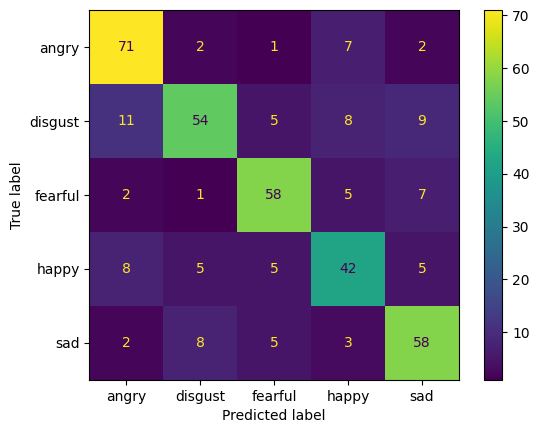

In [ ]:
cm = confusion_matrix(y_test1, grid_predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['angry','disgust','fearful','happy','sad'])
disp.plot()
plt.show()